# Systematic Trading Skeleton Code

The code below install all required packages and then reads inthe list of tickers from wikipedia to then pull the data for the current S&P 500 from yahoo finance.

The DataFrame produced also needs to be cleaned due to the large number of NaN values stored inside and it is up to you to decide exactly how to do this. 

A lot of these NaN values arise because the stock price data for a specific company is not stored on Yahoo finance before a certain date. This could be for multiple reasons. 

The code has been set to remove all dates with NaN values although this only gives approx 6 mounths of data for backtesting. If you want to use more dates for backtesting then this will need to be changed.



In [1]:
import numpy as np
import requests
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [89]:
tickers = list(pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"].dropna())

for i in range(len(tickers)):
  tickers[i] = tickers[i].replace(".","-")
# feel free to change this time value although if you choose a date that was more than 10 years ago it will take yf a while to download all the data
data = yf.download(tickers,"2015-01-01")

[*********************100%***********************]  503 of 503 completed


In [90]:
# running these commands can help to understand the shape of the dataframe object data
data.columns
data.index
data.head()

Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2014-12-31        NaN        NaN         NaN        NaN        NaN        NaN   
2015-01-02  37.941982  51.079914  149.859680  24.603210  46.979832  79.608635   
2015-01-05  37.231041  51.051491  147.884354  23.910099  46.095711  78.931038   
2015-01-06  36.651058  50.255577  147.780411  23.912348  45.867561  79.362259   
2015-01-07  37.137508  50.227154  150.956039  24.247650  47.721359  80.946335   

                                                        ...     Volume  \
                 ABMD        ABT       ACGL        ACN  ...       WYNN   
Date                                                    ...              
2014-12-31        NaN        NaN        NaN        NaN  ...        NaN   
2015-01-02  37.310001  38.606468  19.496668  77.739212  ...  2228900.0   
2015-01-05  37.070000  38.615063  19.379999  76.426643  ...  1695100.0   
2015-01-06  36.130001  38.176544  19.423332  75.875359  ...  1975800.0   
2015-01-07  37.279999  38.486080  19.536667  77.467949  ...  1472000.0   

                                                                               \
                  XEL         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2014-12-31        NaN         NaN        NaN        NaN        NaN        NaN   
2015-01-02  2534900.0  10220400.0  1825800.0   605900.0  2283466.0   936579.0   
2015-01-05  3107200.0  18502400.0  1469800.0  1369900.0  4418651.0  2223873.0   
2015-01-06  4749600.0  16670700.0  1988400.0  1333200.0  5004401.0  1835563.0   
2015-01-07  2833400.0  13590700.0   959800.0  1038600.0  4554134.0  1505860.0   

                                            
                ZBRA       ZION        ZTS  
Date                                        
2014-12-31       NaN        NaN        NaN  
2015-01-02  411800.0  2298700.0  1784200.0  
2015-01-05  420300.0  5326000.0  3112100.0  
2015-01-06  527500.0  9086500.0  3977200.0  
2015-01-07  467800.0  2759900.0  2481800.0  

[5 rows x 3018 columns]

In [91]:
data.iloc[:, 0].isnull().sum()


1

In [99]:
def data_dropna():
  #  note the dataframe below has lots of NaN values because not all stocks were listed from 2016
  return data.dropna()

def data_dropna3(data, start = 1, end=None):
  if start < 1:
    start = 1
  if not end or end > data.shape[0]:
    end = data.shape[0]
  clean_data = data.iloc[start:end].dropna(axis=1)
  print(f"Total NaNs: {clean_data.isnull().sum().sum()}")
  return clean_data

In [100]:
clean = data_dropna3(data)
clean.head()


Total NaNs: 0


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2015-01-02  37.941982  51.079914  149.859680  24.603210  46.979832  79.608635   
2015-01-05  37.231041  51.051491  147.884354  23.910099  46.095711  78.931038   
2015-01-06  36.651058  50.255577  147.780411  23.912348  45.867561  79.362259   
2015-01-07  37.137508  50.227154  150.956039  24.247650  47.721359  80.946335   
2015-01-08  38.250683  50.843029  152.279190  25.179295  48.220451  81.131134   

                                                        ...     Volume  \
                 ABMD        ABT       ACGL        ACN  ...       WYNN   
Date                                                    ...              
2015-01-02  37.310001  38.606468  19.496668  77.739212  ...  2228900.0   
2015-01-05  37.070000  38.615063  19.379999  76.426643  ...  1695100.0   
2015-01-06  36.130001  38.176544  19.423332  75.875359  ...  1975800.0   
2015-01-07  37.279999  38.486080  19.536667  77.467949  ...  1472000.0   
2015-01-08  38.959999  39.277142  19.876667  78.649261  ...  1676600.0   

                                                                               \
                  XEL         XOM       XRAY        XYL        YUM        ZBH   
Date                                                                            
2015-01-02  2534900.0  10220400.0  1825800.0   605900.0  2283466.0   936579.0   
2015-01-05  3107200.0  18502400.0  1469800.0  1369900.0  4418651.0  2223873.0   
2015-01-06  4749600.0  16670700.0  1988400.0  1333200.0  5004401.0  1835563.0   
2015-01-07  2833400.0  13590700.0   959800.0  1038600.0  4554134.0  1505860.0   
2015-01-08  2516800.0  15487500.0  1409500.0   821800.0  4258268.0  1449004.0   

                                            
                ZBRA       ZION        ZTS  
Date                                        
2015-01-02  411800.0  2298700.0  1784200.0  
2015-01-05  420300.0  5326000.0  3112100.0  
2015-01-06  527500.0  9086500.0  3977200.0  
2015-01-07  467800.0  2759900.0  2481800.0  
2015-01-08  324400.0  1831500.0  3121300.0  

[5 rows x 2886 columns]

In [150]:
def buyandhold(start_date, end_date):
  strat = pd.DataFrame(data = np.ones([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  return strat

NameError: name 'df' is not defined

## Time Series Momentum Strategy
The aim of this task is to implement a backtest for the time series momentum strategy:

- This strategy will take a postion in every asset in the given basket.
- If an asset has a negative historic return then a short positon is taken and if it has a postitve histioric return then it a long postion is taken.
- The lookback period for which returns are calculated is the previous 20 days. 

In [102]:
def strat_time_series_momentum(start_date, end_date): # enter youre team name!!!
  # insert your strategy here!!!!!
  # note this function shoudl return a dataframe of weights with columns representing each stock
  # and index representing the same datetime index as the data used
  momentum = df.pct_change(20)
  strat = momentum/(500*abs(momentum))
  strat = strat.fillna(0)
  return strat


## Relative Momentum Strategy
The aim of this task is to implement a backtest for the relative momentum strategy:

- For each date the strategy will take a long postion in the p best previous performing stocks and a short postion in the p worst performing stocks.
- The lookback period for which performance will be judged will be the previous t days.
- We will also only adjust our portfolio weights every q days. Note the first date that we can calculate weights will be on date (t+1) so we aim to adjust our portfolio weights every q days after this.
- For the worst performing stocks the weights should be negative and for the best performing stocks weights postitive such that the sum of the absolute values across each row of the strategy weights is equal to 1!! I.e the weights for the worst stocks are -1/(2p) and for the best p stocks 1/(2p). All other weights are 0.

For this algorithm performance is measured by cumulative returns.

In [ ]:
def strat_relative_momentum(start_date, end_date):
  ##### enter code below
  t = 20
  q = 20
  p = 10
  weight = 1/(2*p)
  n_rows = data.shape[0]
  momentum = df.pct_change(t)
  strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)])/len(df.columns), 
                       index = df.index)
  
  
  for i in range(21, n_rows, q):
      if i % q == 1:
        date = str(momentum.index[i])[:10]
        row = momentum.iloc[i]
        buy = row.nlargest(p)*weight
        sell = row.nsmallest(p)
      for stock in buy.index:
        strat[stock, date] = weight
      for stock in sell.index:
        strat[stock, date] = -weight
  return strat

In [149]:
momentum = clean["Adj Close"].pct_change(20)
#strat = pd.DataFrame(data = np.zeros([len(df),len(df.columns)])/len(df.columns), 
                       #index = df.index)
strat = pd.DataFrame(data = np.zeros([len(clean),len(clean.columns)])/len(clean.columns), index = clean.index)
weight = 0.05
for i in range(21, 1800, 100):
    date = momentum.iloc[i]
date.nlargest(10)*weight
buy = date.nsmallest(10)
buy = buy*weight/abs(buy)
for stock in buy.index:
    stock
strat

,0,1,2,3,4,5,6,7,8,9,...,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def strategy(start_date, end_date, 
                  strat_func=buyandhold, data_func=data_dropna, 
                  fig_strat=True, risk_free_rate = 0.001):
  global df 
  df = data_func()["Adj Close"][start_date: end_date]
  return_df = np.array(df.pct_change())
  strat_df = pd.DataFrame(index = df.index)
  strat_df["daily returns"] = (return_df * strat_func(start_date, end_date).shift(1)).sum(axis=1)
  strat_df["cumulative % returns"] = ((strat_df["daily returns"]+1).cumprod() - 1) * 100
  
  sharpe  = 0.01*((strat_df["cumulative % returns"][-1]/100 - 
                    len(strat_df) * risk_free_rate) /
                    strat_df["daily returns"].std())
  if fig_strat:
    plt.figure()
    plt.title("Strategy Backtest from "+ start_date+" to "+end_date)
    plt.plot(strat_df["cumulative % returns"])
    plt.plot(strat_df["cumulative % returns"].rolling(25).mean())
    plt.show()
  
  return strat_df, sharpe
 

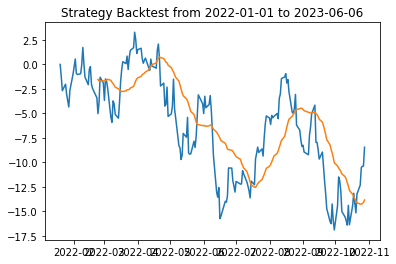

(            daily returns  cumulative % returns
 Date                                           
 2022-01-19       0.000000              0.000000
 2022-01-20      -0.012263             -1.226333
 2022-01-21      -0.014725             -2.680746
 2022-01-24       0.006825             -2.016587
 2022-01-25      -0.010516             -3.046950
 ...                   ...                   ...
 2022-10-24       0.010497            -12.316104
 2022-10-25       0.020445            -10.523370
 2022-10-26       0.001435            -10.395001
 2022-10-27       0.000228            -10.374565
 2022-10-28       0.021444             -8.452650
 
 [197 rows x 2 columns], -0.18684741835469254)

In [ ]:
strategy("2022-01-01", "2023-06-06") # example for buy and hold strategy after removing all dates with NaN values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


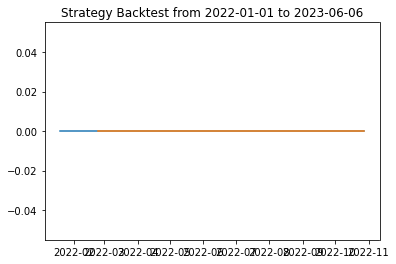

(            daily returns  cumulative % returns
 Date                                           
 2022-01-19            0.0                   0.0
 2022-01-20            0.0                   0.0
 2022-01-21            0.0                   0.0
 2022-01-24            0.0                   0.0
 2022-01-25            0.0                   0.0
 ...                   ...                   ...
 2022-10-24            0.0                   0.0
 2022-10-25            0.0                   0.0
 2022-10-26            0.0                   0.0
 2022-10-27            0.0                   0.0
 2022-10-28            0.0                   0.0
 
 [197 rows x 2 columns], -inf)

In [ ]:
 # use this cell to backtest your own strategy. make sure to change the function names
strategy("2022-01-01", "2023-06-06", strat_func = strat_insert_team_name, data_func = data_enter_team_name)